In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print("Library are successfully import")

Library are successfully import


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv("/content/drive/My Drive/ML/Data/50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


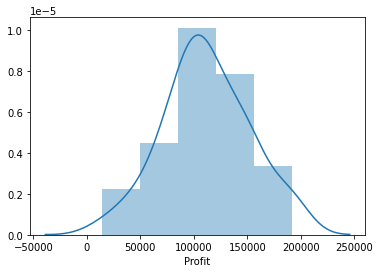

In [3]:
sns.distplot(dataset['Profit'],bins = 5, kde = True)

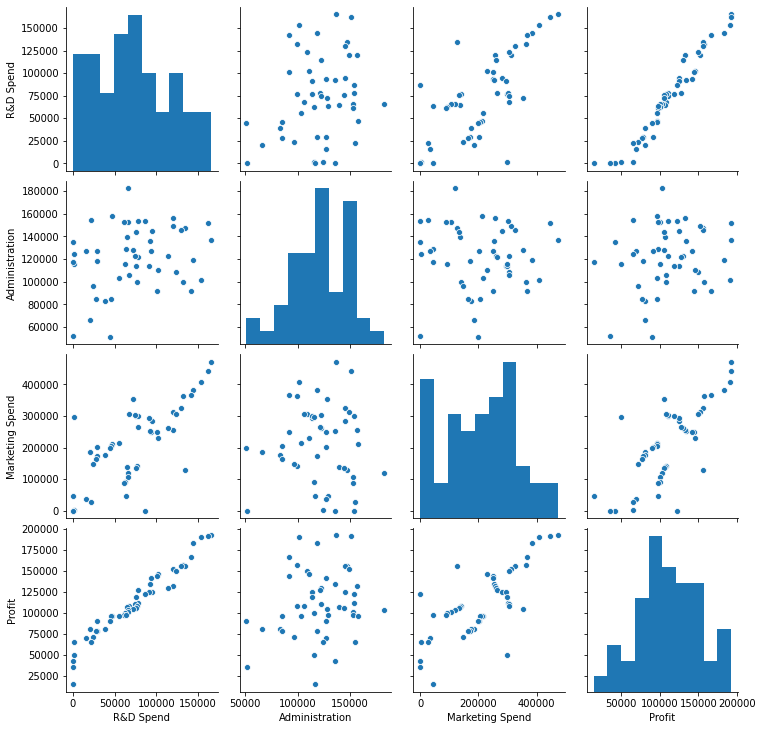

In [4]:
sns.pairplot(dataset)

In [5]:
dataset.isnull().sum().sort_values(ascending = False)

Profit             0
State              0
Marketing Spend    0
Administration     0
R&D Spend          0
dtype: int64

In [0]:
X = dataset.iloc[: , :-1].values
Y = dataset.iloc[: , 4].values

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
transformer = ColumnTransformer(
    transformers=[
        ("OneHotEncoder",        
         OneHotEncoder(), 
         [3]              
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X).tolist()

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.coef_

array([ 8.66383692e+01, -8.72645791e+02,  7.86007422e+02,  7.73467193e-01,
        3.28845975e-02,  3.66100259e-02])

In [0]:
reg.score(X_train,Y_train)
Y_pred = reg.predict(X_test)  

In [17]:
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [18]:
print(Y_pred)

[103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]
